In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Projects_\Flight Price Prediction\Clean_Dataset.csv")

In [3]:
df.shape

(300153, 12)

In [4]:
df1 = pd.read_csv(r"C:\Users\Admin\Desktop\Projects_\Flight Price Prediction\business.csv")
df2 = pd.read_csv(r"C:\Users\Admin\Desktop\Projects_\Flight Price Prediction\economy.csv")
print(df1.shape)
print(df2.shape)

(93487, 11)
(206774, 11)


In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [12]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

#### Total 10 features, 2 numerical:

[Text(0.5, 0, 'airline'), Text(0, 0.5, 'Frequency of airline')]

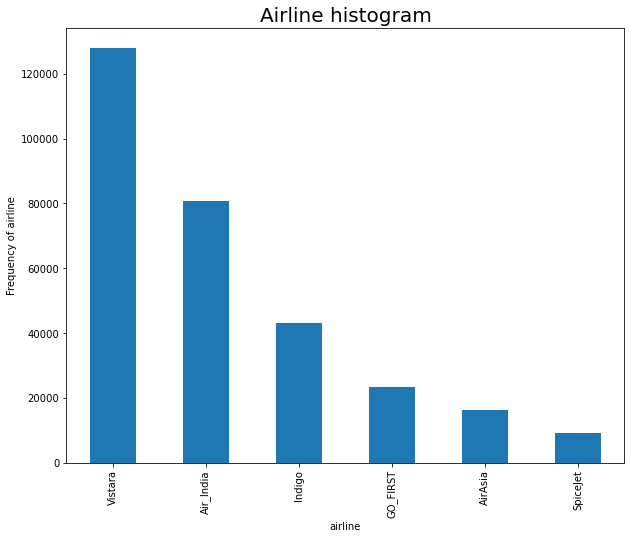

In [13]:
plt.figure(figsize=(10, 8))
plt1 = df.airline.value_counts().plot(kind='bar')
plt.title('Airline histogram', fontsize=20)
plt1.set(xlabel = 'airline', ylabel='Frequency of airline')


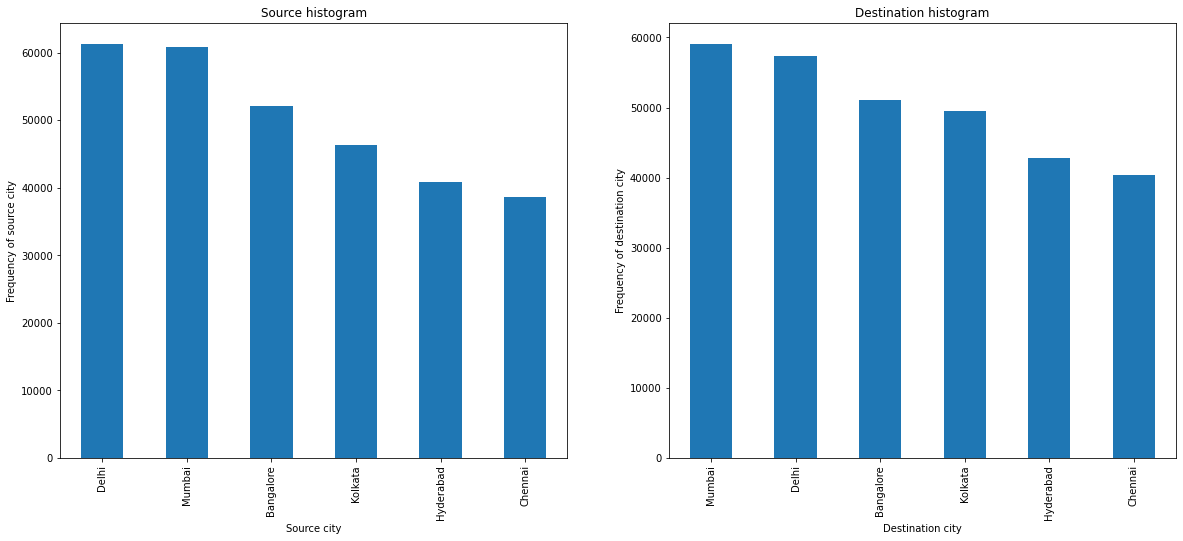

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Source histogram')
plt1 = df['source_city'].value_counts().plot(kind='bar')
plt1.set(xlabel = 'Source city', ylabel='Frequency of source city')

plt.subplot(1,2,2)
plt.title('Destination histogram')
plt1 = df['destination_city'].value_counts().plot(kind='bar')
plt1.set(xlabel = 'Destination city', ylabel='Frequency of destination city')
plt.show()

In [15]:
df.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

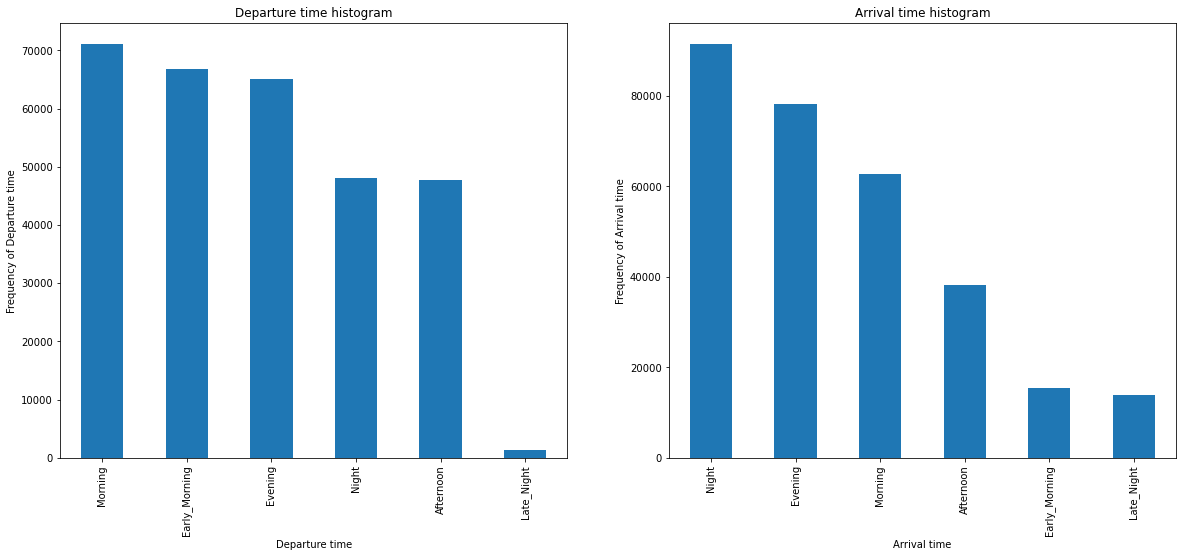

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Departure time histogram')
plt1 = df.departure_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Departure time', ylabel='Frequency of Departure time')

plt.subplot(1,2,2)
plt.title('Arrival time histogram')
plt1 = df.arrival_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Arrival time', ylabel='Frequency of Arrival time')
plt.show()

##### Most of the departing flights are in the morning and most arrival flights are during night. Very few Late night departure and arrival of flights.

In [17]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

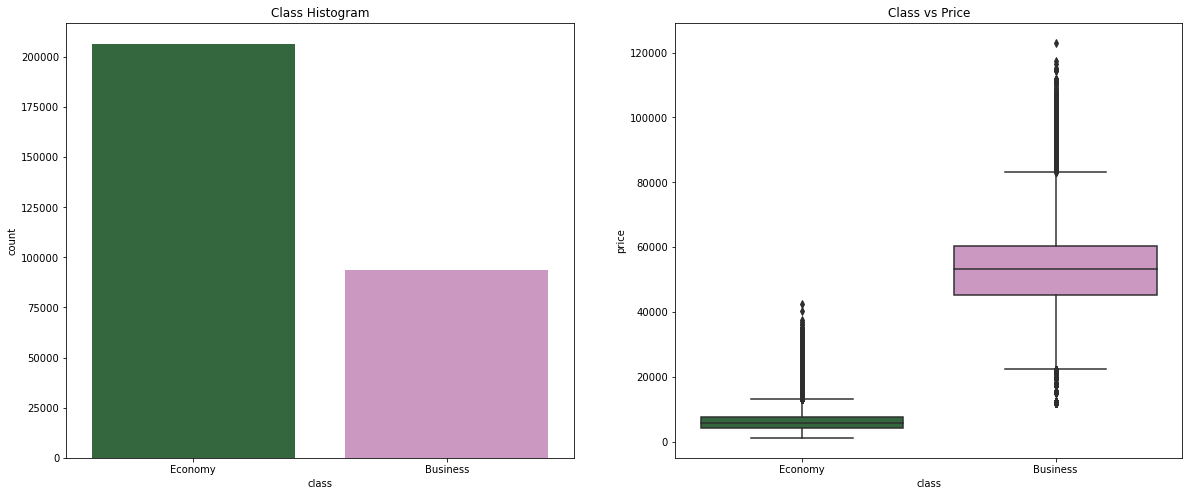

In [18]:


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Class Histogram')
sns.countplot(df['class'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Class vs Price')
sns.boxplot(x=df['class'], y=df.price, palette=("cubehelix"))

plt.show()

In [19]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [20]:
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

[Text(0.5, 0, 'airline'), Text(0, 0.5, 'Frequency of airline')]

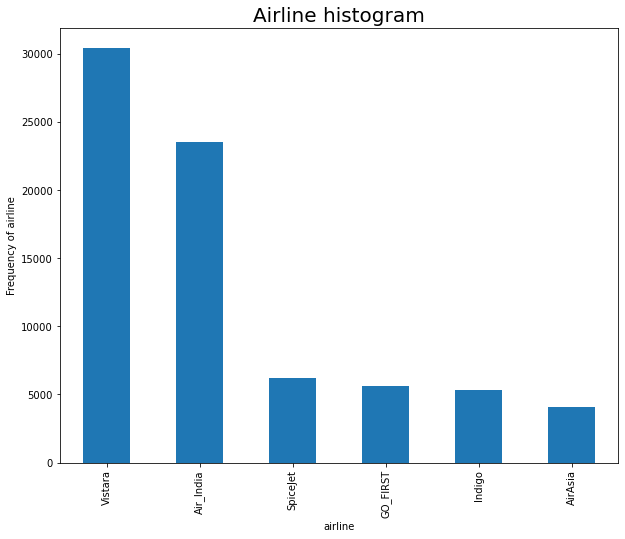

In [21]:
plt.figure(figsize=(10, 8))
plt1 = df.groupby('airline')['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('Airline histogram', fontsize=20)
plt1.set(xlabel = 'airline', ylabel='Frequency of airline')

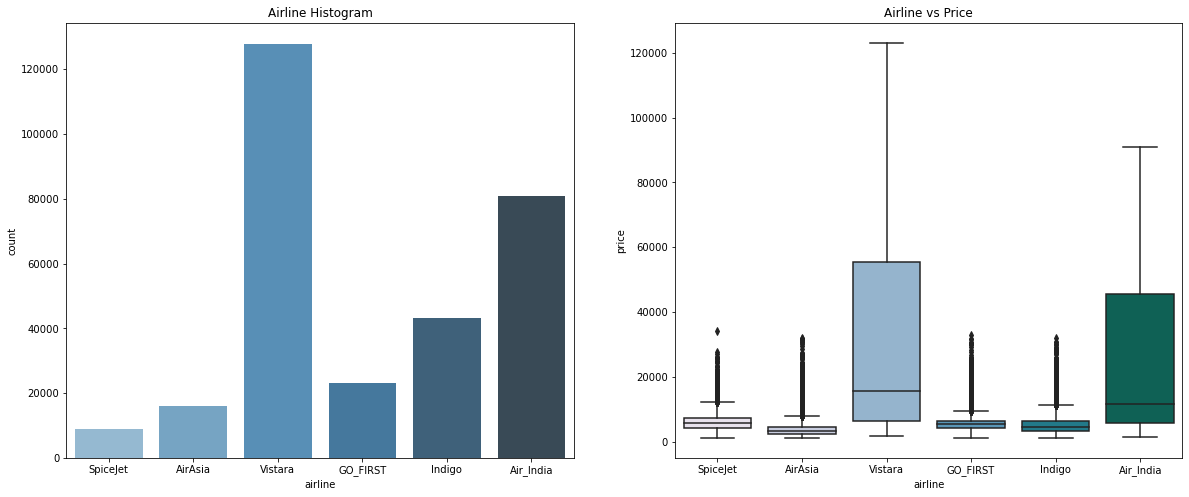

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Airline Histogram')
sns.countplot(df.airline, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Airline vs Price')
sns.boxplot(x=df.airline, y=df.price, palette=("PuBuGn"))

plt.show()

##### Average price of Vistara flight is highest while that of AirAsia is the lowest.

In [23]:
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

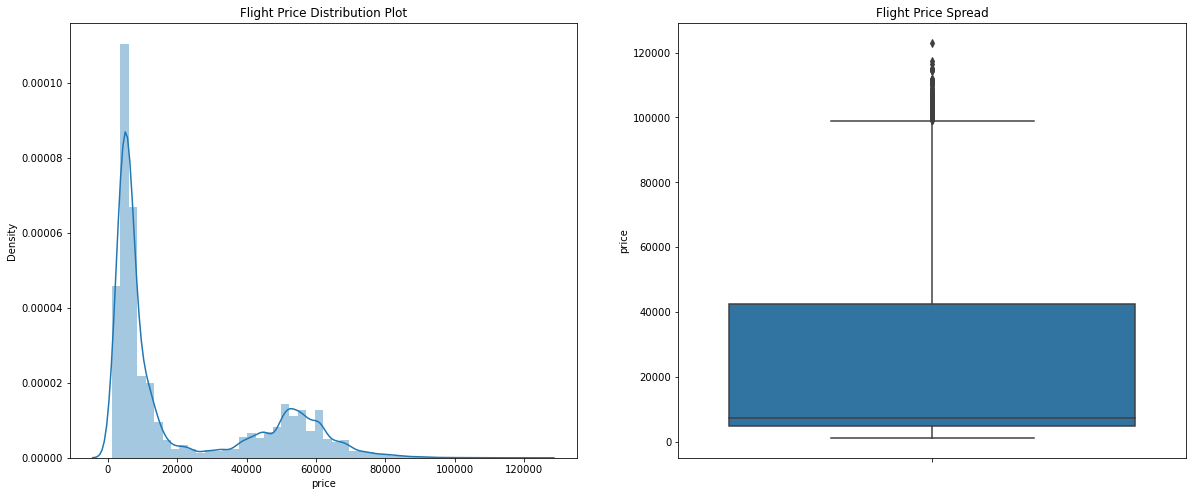

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Flight Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Flight Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [25]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
85%       53743.000000
90%       57920.000000
100%     123071.000000
max      123071.000000
Name: price, dtype: float64


##### Median flight price is much less than the average flight price.

In [26]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [27]:
df.days_left.nunique()

49

In [28]:
gby1 = df.groupby(['source_city', 'destination_city', 'days_left'])['price'].mean()
gby1

source_city  destination_city  days_left
Bangalore    Chennai           1            22647.710526
                               2            32438.043956
                               3            30463.322917
                               4            25613.474227
                               5            24440.059322
                                                ...     
Mumbai       Kolkata           45           20009.839552
                               46           21356.389961
                               47           20899.023715
                               48           20550.008032
                               49           20710.546875
Name: price, Length: 1470, dtype: float64

In [29]:
gby1 = gby1.reset_index()

In [30]:
gby1.index.values

array([   0,    1,    2, ..., 1467, 1468, 1469], dtype=int64)

In [31]:
gby1['combined_col'] = gby1['source_city'] + '_' + gby1['destination_city']

In [32]:
gby1.combined_col.nunique()

30

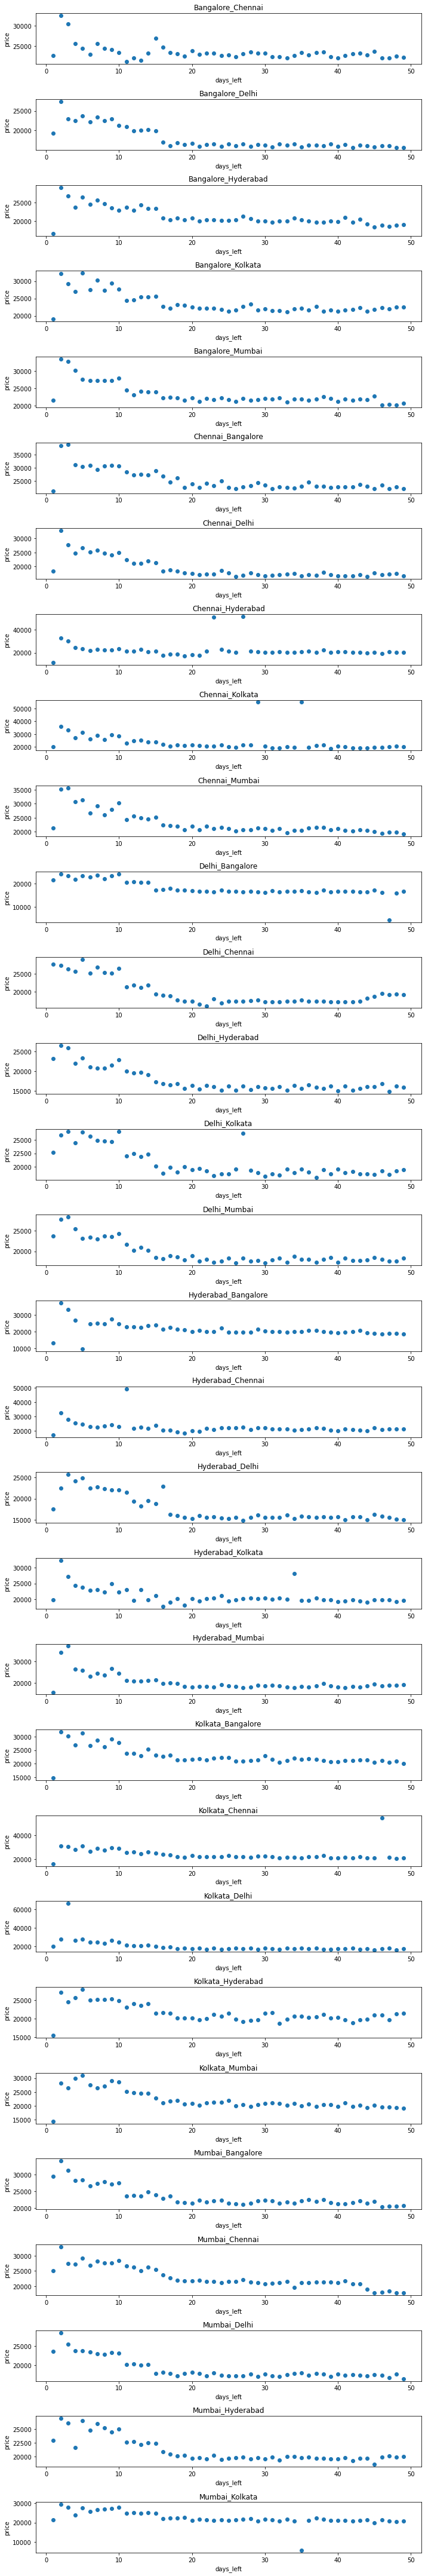

In [33]:
plt.figure(figsize=(10,60))
for indx, val in enumerate(gby1.combined_col.unique()):
    plt.subplot(30,1,indx+1)
    temp_df = gby1.loc[gby1['combined_col'] == val]
    plt.scatter(temp_df['days_left'], temp_df['price'])
    plt.title(val)
    plt.xlabel('days_left')
    plt.ylabel('price')

plt.tight_layout()

##### Prices are low when a ticket is booked many days before the departure and price increases as the days left get reduced. Also there is a drop in prices one day before the departure.

In [34]:
df['price_per_minute'] = df['price']/df['duration']*60

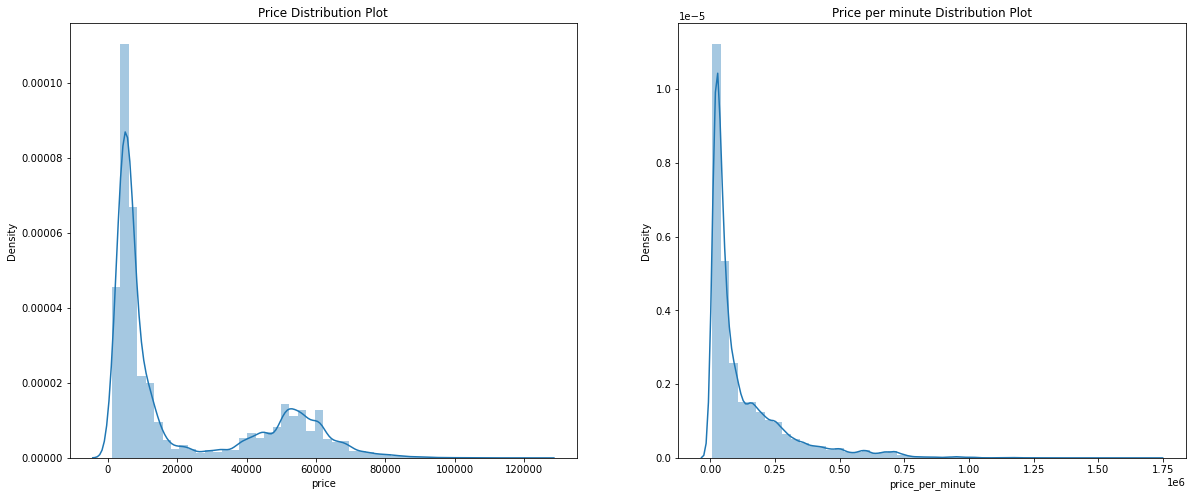

In [35]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Price per minute Distribution Plot')
sns.distplot(df.price_per_minute)

plt.show()

In [36]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'price_per_minute'],
      dtype='object')

In [37]:
df.departure_time = 'dept' + df.departure_time
df.arrival_time = 'arr' + df.arrival_time

df.source_city = 'source' + df.source_city
df.destination_city = 'destination' + df.destination_city

In [38]:
df_f = df[['airline', 'source_city', 'departure_time', 'stops',
               'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
               'price']]

In [39]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_per_minute
0,SpiceJet,SG-8709,sourceDelhi,deptEvening,zero,arrNight,destinationMumbai,Economy,2.17,1,5953,164599.078341
1,SpiceJet,SG-8157,sourceDelhi,deptEarly_Morning,zero,arrMorning,destinationMumbai,Economy,2.33,1,5953,153296.137339
2,AirAsia,I5-764,sourceDelhi,deptEarly_Morning,zero,arrEarly_Morning,destinationMumbai,Economy,2.17,1,5956,164682.027650
3,Vistara,UK-995,sourceDelhi,deptMorning,zero,arrAfternoon,destinationMumbai,Economy,2.25,1,5955,158800.000000
4,Vistara,UK-963,sourceDelhi,deptMorning,zero,arrMorning,destinationMumbai,Economy,2.33,1,5955,153347.639485


In [40]:
# Defining the map function
def dummies(x,df_):
    temp = pd.get_dummies(df_[x], drop_first = True)
    df_ = pd.concat([df_, temp], axis = 1)
    df_.drop([x], axis = 1, inplace = True)
    return df_
# Applying the function to the cars_lr

df_f = dummies('airline',df_f)
# df_f = dummies('flight',df_f)
df_f = dummies('source_city',df_f)
df_f = dummies('departure_time',df_f)
df_f = dummies('stops',df_f)
df_f = dummies('arrival_time',df_f)
df_f = dummies('destination_city',df_f)
df_f = dummies('class',df_f)

In [41]:
df_f.shape

(300153, 31)

In [42]:
df_f.columns

Index(['duration', 'days_left', 'price', 'Air_India', 'GO_FIRST', 'Indigo',
       'SpiceJet', 'Vistara', 'sourceChennai', 'sourceDelhi',
       'sourceHyderabad', 'sourceKolkata', 'sourceMumbai', 'deptEarly_Morning',
       'deptEvening', 'deptLate_Night', 'deptMorning', 'deptNight',
       'two_or_more', 'zero', 'arrEarly_Morning', 'arrEvening',
       'arrLate_Night', 'arrMorning', 'arrNight', 'destinationChennai',
       'destinationDelhi', 'destinationHyderabad', 'destinationKolkata',
       'destinationMumbai', 'Economy'],
      dtype='object')

#### Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_f, train_size = 0.8, test_size = 0.2, random_state = 100)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['duration', 'days_left','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()


,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,sourceChennai,sourceDelhi,...,arrEvening,arrLate_Night,arrMorning,arrNight,destinationChennai,destinationDelhi,destinationHyderabad,destinationKolkata,destinationMumbai,Economy
84945,0.090580,0.104167,0.086770,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
32828,0.298380,0.645833,0.033837,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
115682,0.545396,0.041667,0.093051,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
121005,0.415601,0.208333,0.108711,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
300062,0.323316,0.958333,0.651321,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0


In [46]:
df_train.describe()

,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,sourceChennai,sourceDelhi,...,arrEvening,arrLate_Night,arrMorning,arrNight,destinationChennai,destinationDelhi,destinationHyderabad,destinationKolkata,destinationMumbai,Economy
count,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,...,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.000000,240122.00000,240122.000000,240122.000000
mean,0.242997,0.520832,0.162153,0.269038,0.077186,0.143115,0.029743,0.427125,0.129276,0.204005,...,0.260859,0.046481,0.209319,0.305378,0.135044,0.191070,0.142523,0.16460,0.196479,0.688833
std,0.153365,0.282500,0.186033,0.443461,0.266887,0.350191,0.169878,0.494662,0.335506,0.402973,...,0.439104,0.210524,0.406823,0.460568,0.341771,0.393145,0.349587,0.37082,0.397336,0.462972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.127877,0.291667,0.030164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.222080,0.520833,0.051818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,0.326939,0.770833,0.339570,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


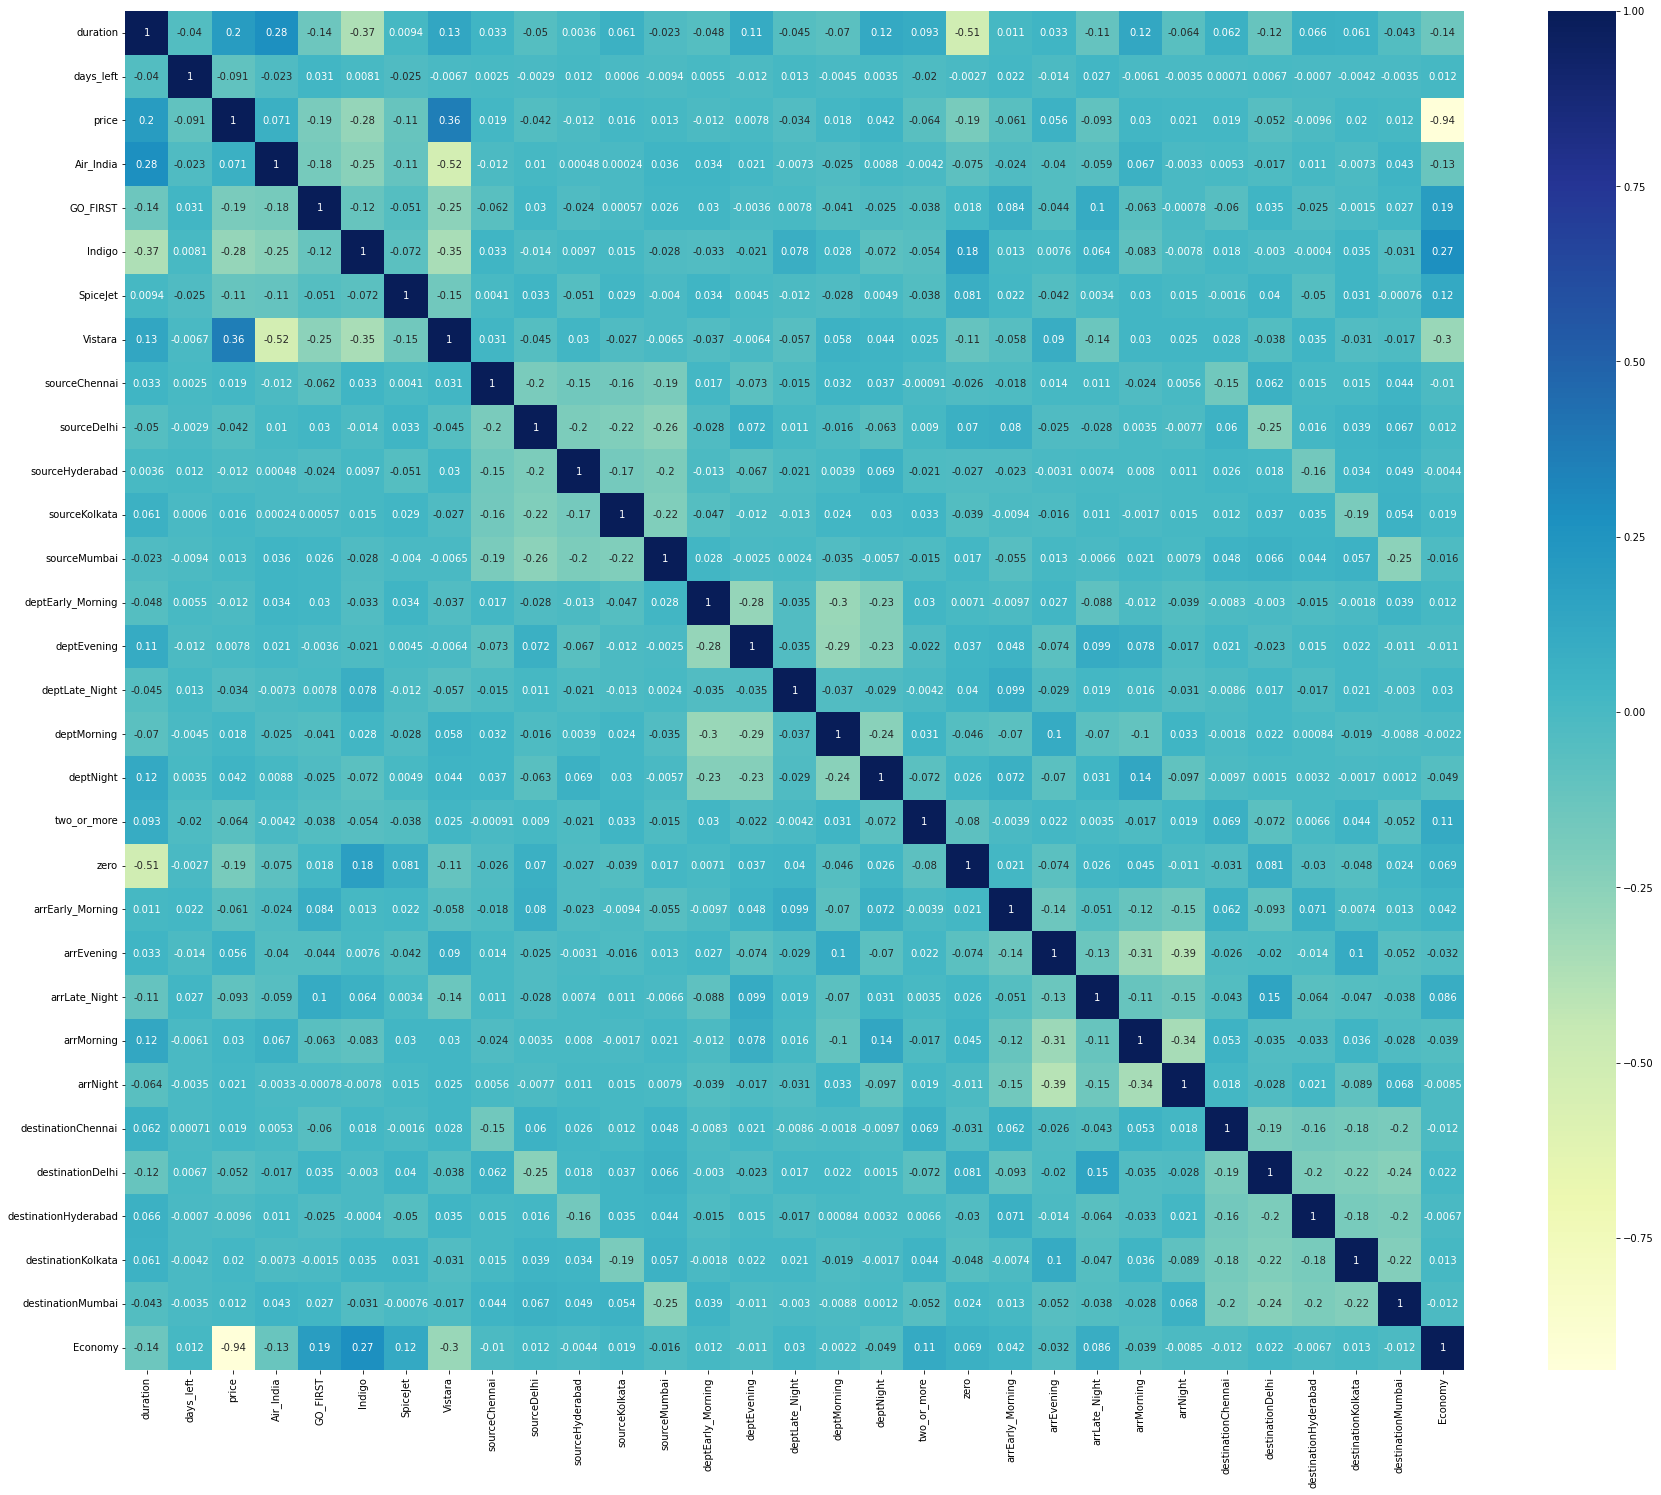

In [47]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [48]:
y_train = df_train.pop('price')
X_train = df_train

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('duration', True, 1),
 ('days_left', True, 1),
 ('Air_India', False, 19),
 ('GO_FIRST', False, 2),
 ('Indigo', True, 1),
 ('SpiceJet', True, 1),
 ('Vistara', True, 1),
 ('sourceChennai', False, 20),
 ('sourceDelhi', False, 7),
 ('sourceHyderabad', False, 5),
 ('sourceKolkata', True, 1),
 ('sourceMumbai', False, 17),
 ('deptEarly_Morning', False, 10),
 ('deptEvening', False, 11),
 ('deptLate_Night', False, 8),
 ('deptMorning', False, 9),
 ('deptNight', False, 12),
 ('two_or_more', True, 1),
 ('zero', True, 1),
 ('arrEarly_Morning', False, 3),
 ('arrEvening', False, 15),
 ('arrLate_Night', False, 14),
 ('arrMorning', False, 16),
 ('arrNight', False, 13),
 ('destinationChennai', False, 18),
 ('destinationDelhi', False, 6),
 ('destinationHyderabad', False, 4),
 ('destinationKolkata', True, 1),
 ('destinationMumbai', False, 21),
 ('Economy', True, 1)]

In [52]:
X_train.columns[rfe.support_]

Index(['duration', 'days_left', 'Indigo', 'SpiceJet', 'Vistara',
       'sourceKolkata', 'two_or_more', 'zero', 'destinationKolkata',
       'Economy'],
      dtype='object')

In [53]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,duration,days_left,Indigo,SpiceJet,Vistara,sourceKolkata,two_or_more,zero,destinationKolkata,Economy
84945,0.090580,0.104167,1,0,0,0,0,0,0,1
32828,0.298380,0.645833,0,0,0,0,0,0,0,1
115682,0.545396,0.041667,0,0,1,0,0,0,0,1
121005,0.415601,0.208333,0,0,1,1,0,0,0,1
300062,0.323316,0.958333,0,0,1,0,0,0,0,0


In [54]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [55]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.402e+05
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:08:44   Log-Likelihood:             3.5108e+05
No. Observations:              240122   AIC:                        -7.021e+05
Df Residuals:                  240111   BIC:                        -7.020e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4257      0

In [56]:
checkVIF(X_train_new)

,Features,VIF
0,const,15.25
1,duration,1.55
8,zero,1.38
3,Indigo,1.37
5,Vistara,1.24
10,Economy,1.18
4,SpiceJet,1.07
6,sourceKolkata,1.05
9,destinationKolkata,1.05
7,two_or_more,1.04


In [57]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

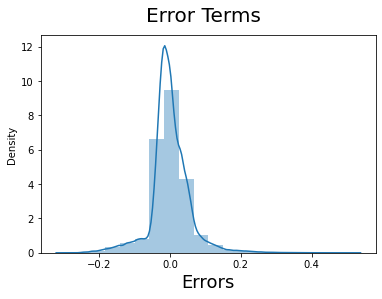

In [58]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Prediction and evaluation

In [59]:
#Scaling the test set
num_vars = ['duration', 'days_left', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [60]:
y_test = df_test.pop('price')
X_test = df_test

In [61]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
y_pred = lm.predict(X_test_new)

In [63]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9022626224854751

Text(0, 0.5, 'y_pred')

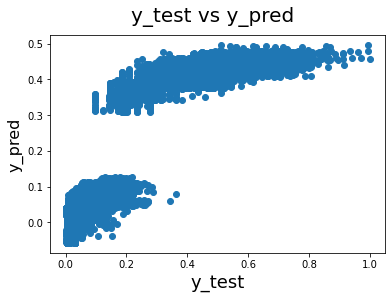

In [64]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [65]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.402e+05
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:08:49   Log-Likelihood:             3.5108e+05
No. Observations:              240122   AIC:                        -7.021e+05
Df Residuals:                  240111   BIC:                        -7.020e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4257      0